In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/onlinefraud.csv')

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [6]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [7]:
print(df.isnull().sum()) #check for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

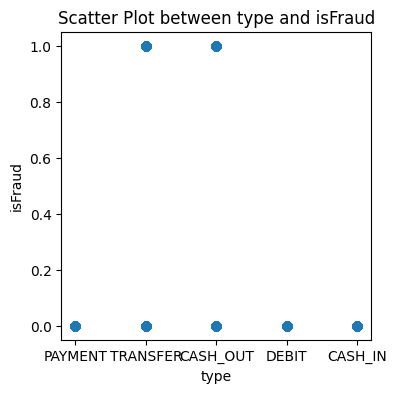

In [9]:
plt.figure(figsize=(4, 4))
plt.scatter(df['type'], df['isFraud'], alpha=0.5)
plt.title('Scatter Plot between type and isFraud')
plt.xlabel('type')
plt.ylabel('isFraud')
plt.show()

In [10]:
# Get one hot encoding of columns B
# Check if 'type' column exists before creating dummies
if 'type' in df.columns:
    one_hot = pd.get_dummies(df['type'])
    # Drop column B as it is now encoded
    df = df.drop('type',axis = 1)
    # Join the encoded df
    df = df.join(one_hot)
else:
    print("Column 'type' not found in the DataFrame.")

df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [11]:
df['C'] = df['nameOrig'].str[0]
df['rest'] = df['nameOrig'].str[1:]
df = df.drop('C', axis=1)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,rest
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,1231006815
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,1666544295
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,1305486145
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,840083671
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,2048537720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,786484425
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,1529008245
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,1162922333
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,1685995037


In [12]:
df['nameDest_ini'] = df['nameDest'].str[0]
df['new_nameDest'] = df['nameDest'].str[1:]

In [13]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,rest,nameDest_ini,new_nameDest
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,1231006815,M,1979787155
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,1666544295,M,2044282225
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,1305486145,C,553264065
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,840083671,C,38997010
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,2048537720,M,1230701703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,786484425,C,776919290
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,1529008245,C,1881841831
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,1162922333,C,1365125890
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,1685995037,C,2080388513


In [14]:
df = df.drop('nameOrig', axis=1)
df = df.drop('nameDest', axis=1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,rest,nameDest_ini,new_nameDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,1231006815,M,1979787155
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,1666544295,M,2044282225
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,1305486145,C,553264065
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,840083671,C,38997010
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,2048537720,M,1230701703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,786484425,C,776919290
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,1529008245,C,1881841831
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,1162922333,C,1365125890
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,1685995037,C,2080388513


In [15]:
scaler = StandardScaler()
df[['step']] = scaler.fit_transform(df[['step']])
df[['amount']] = scaler.fit_transform(df[['amount']])
df[['oldbalanceOrg']] = scaler.fit_transform(df[['oldbalanceOrg']])
df[['newbalanceOrig']] = scaler.fit_transform(df[['newbalanceOrig']])
df[['oldbalanceDest']] = scaler.fit_transform(df[['oldbalanceDest']])
df[['newbalanceDest']] = scaler.fit_transform(df[['newbalanceDest']])
df[['rest']] = scaler.fit_transform(df[['rest']])
df[['new_nameDest']] = scaler.fit_transform(df[['new_nameDest']])
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,rest,nameDest_ini,new_nameDest
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,False,False,False,True,False,0.253593,M,1.460702
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,False,False,False,True,False,0.955985,M,1.564644
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.373706,C,-0.838315
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,-0.376848,C,-1.667119
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,False,False,False,True,False,1.572025,M,0.253459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,False,True,False,False,False,-0.463288,C,-0.477867
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.734180,C,1.302851
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,False,True,False,False,False,0.143794,C,0.470100
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.987353,C,1.622833


In [16]:
if 'nameDest_ini' in df.columns:
    one_hot = pd.get_dummies(df['nameDest_ini'])
    df = df.drop('nameDest_ini',axis = 1)
    df = df.join(one_hot)
else:
    print("Column 'type' not found in the DataFrame.")

In [17]:
df


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,rest,new_nameDest,C,M
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,False,False,False,True,False,0.253593,1.460702,False,True
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,False,False,False,True,False,0.955985,1.564644,False,True
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.373706,-0.838315,True,False
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,-0.376848,-1.667119,True,False
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,False,False,False,True,False,1.572025,0.253459,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,False,True,False,False,False,-0.463288,-0.477867,True,False
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.734180,1.302851,True,False
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,False,True,False,False,False,0.143794,0.470100,True,False
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.987353,1.622833,True,False


In [18]:
df = df.drop('C', axis=1)

In [19]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,rest,new_nameDest,M
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,False,False,False,True,False,0.253593,1.460702,True
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,False,False,False,True,False,0.955985,1.564644,True
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.373706,-0.838315,False
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,-0.376848,-1.667119,False
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,False,False,False,True,False,1.572025,0.253459,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,False,True,False,False,False,-0.463288,-0.477867,False
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.734180,1.302851,False
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,False,True,False,False,False,0.143794,0.470100,False
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,0.987353,1.622833,False


In [20]:
df = df.drop('new_nameDest', axis=1)
df = df.drop('rest', axis=1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,M
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,False,False,False,True,False,True
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,False,False,False,True,False,True
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,False
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,False,True,False,False,False,False
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,False,True,False,False,False,False
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False


In [21]:
df_isFraud = df[df['isFraud'] == 1]
df_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,M
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,False
251,-1.703042,-0.293208,-0.287745,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
252,-1.703042,-0.293208,-0.287745,-0.292442,-0.316106,-0.333411,1,0,False,True,False,False,False,False
680,-1.703042,-0.264522,-0.281748,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,0,False,True,False,False,False,False
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,0,False,True,False,False,False,False
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False


In [22]:
df_isNotFraud = df[df['isFraud'] == 0]
df_isNotFraud_sampled = df_isNotFraud.sample(n=8213, random_state=42)
df_isNotFraud_sampled

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,M
1777056,-0.571883,0.006532,-0.282003,-0.292442,-0.211266,-0.179258,0,0,False,True,False,False,False,False
1350600,-0.747529,-0.296991,-0.288716,-0.292442,-0.323814,-0.333411,0,0,False,False,False,True,False,True
1991933,-0.452444,-0.292095,-0.281843,-0.286842,-0.323814,-0.333411,0,0,False,False,False,True,False,True
5092368,0.784102,-0.295013,-0.286719,-0.291056,-0.323814,-0.333411,0,0,False,False,False,True,False,True
5066515,0.777076,0.121333,0.171252,0.248462,0.474385,0.336160,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779354,0.643585,0.142349,-0.288716,-0.292442,-0.059112,-0.016168,0,0,False,True,False,False,False,False
1913121,-0.543780,0.011356,-0.288661,-0.228531,-0.323814,-0.333411,0,0,True,False,False,False,False,False
1989584,-0.452444,-0.071026,-0.288716,-0.292442,0.011691,0.014267,0,0,False,True,False,False,False,False
3085033,-0.058998,-0.281401,-0.189595,-0.197932,-0.323814,-0.333411,0,0,False,False,False,True,False,True


In [23]:
df.combined = pd.concat([df_isFraud, df_isNotFraud_sampled])
df.combined

<ipython-input-23-9f2d6301788e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.combined = pd.concat([df_isFraud, df_isNotFraud_sampled])


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,M
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,False,True,False,False,False,False
251,-1.703042,-0.293208,-0.287745,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
252,-1.703042,-0.293208,-0.287745,-0.292442,-0.316106,-0.333411,1,0,False,True,False,False,False,False
680,-1.703042,-0.264522,-0.281748,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779354,0.643585,0.142349,-0.288716,-0.292442,-0.059112,-0.016168,0,0,False,True,False,False,False,False
1913121,-0.543780,0.011356,-0.288661,-0.228531,-0.323814,-0.333411,0,0,True,False,False,False,False,False
1989584,-0.452444,-0.071026,-0.288716,-0.292442,0.011691,0.014267,0,0,False,True,False,False,False,False
3085033,-0.058998,-0.281401,-0.189595,-0.197932,-0.323814,-0.333411,0,0,False,False,False,True,False,True


In [24]:
df_shuffled = df.combined.sample(frac=1, random_state=42)  # Set random_state for reproducibility

In [25]:
df_shuffled

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,M
5682294,1.079187,-0.171085,0.090841,0.108647,0.325985,0.246926,0,0,True,False,False,False,False,False
3256548,0.053416,-0.276960,-0.171281,-0.180759,-0.323814,-0.333411,0,0,False,False,False,True,False,True
1059489,-1.021536,-0.284515,-0.285928,-0.292442,-0.323814,-0.331219,1,0,False,True,False,False,False,False
6161404,2.154138,0.269017,-0.170198,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False
6206417,2.407068,3.977238,0.605097,-0.292442,-0.323814,0.369218,1,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546533,0.973799,0.600472,-0.288716,-0.292442,0.193227,0.292581,0,0,False,True,False,False,False,False
796333,-1.429034,-0.294488,2.351530,2.316170,-0.228508,-0.245791,0,0,True,False,False,False,False,False
6039793,1.690434,-0.039150,-0.234628,-0.292442,-0.323814,-0.290892,1,0,False,True,False,False,False,False
1030533,-1.211234,2.801472,0.359274,-0.292442,-0.323814,-0.333411,1,0,False,False,False,False,True,False


In [26]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [27]:
# Split into training and remaining (for CV and testing)
df_train, df_test = train_test_split(df_shuffled, test_size=0.25, random_state=42)


print(f"Training set size: {df_train.shape}")
print(f"Testing set size: {df_test.shape}")

Training set size: (12319, 14)
Testing set size: (4107, 14)


In [28]:
# Assuming 'isFraud' is the target variable
X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']

X_test = df_test.drop('isFraud', axis=1)
y_test = df_test['isFraud']

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9922084246408571


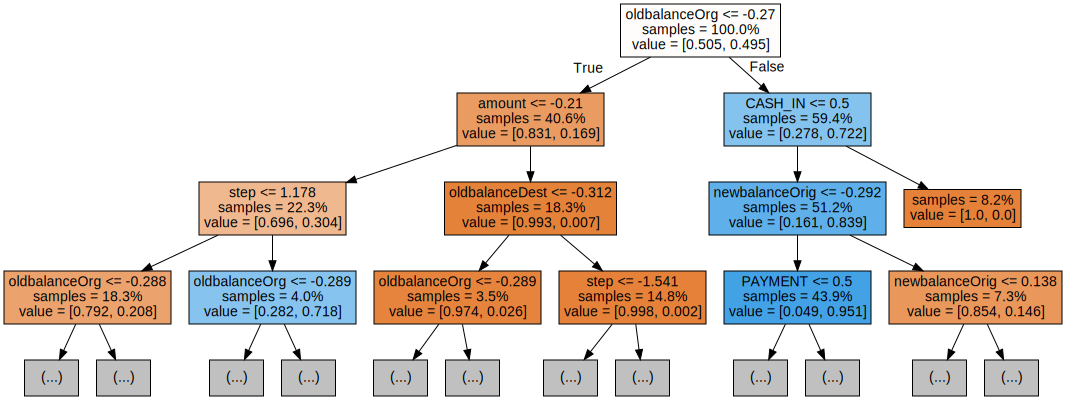

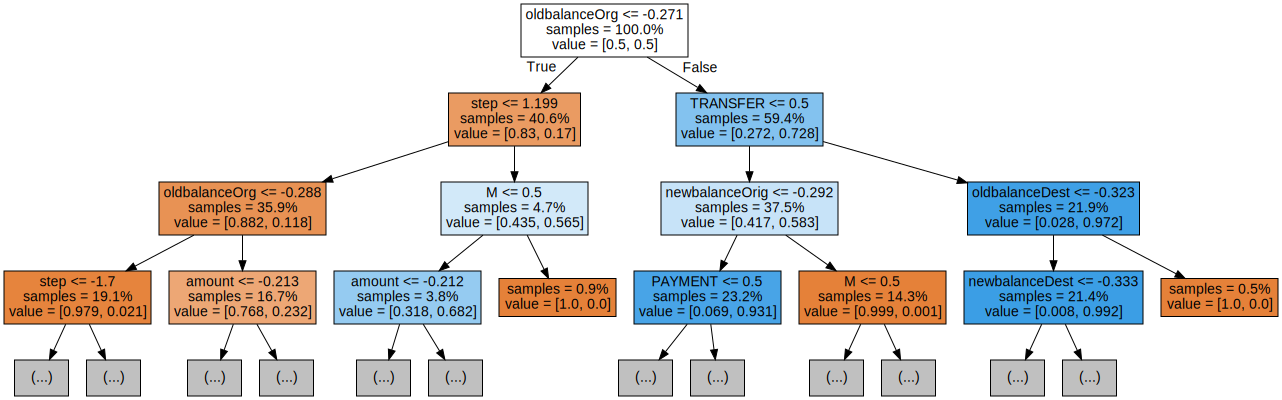

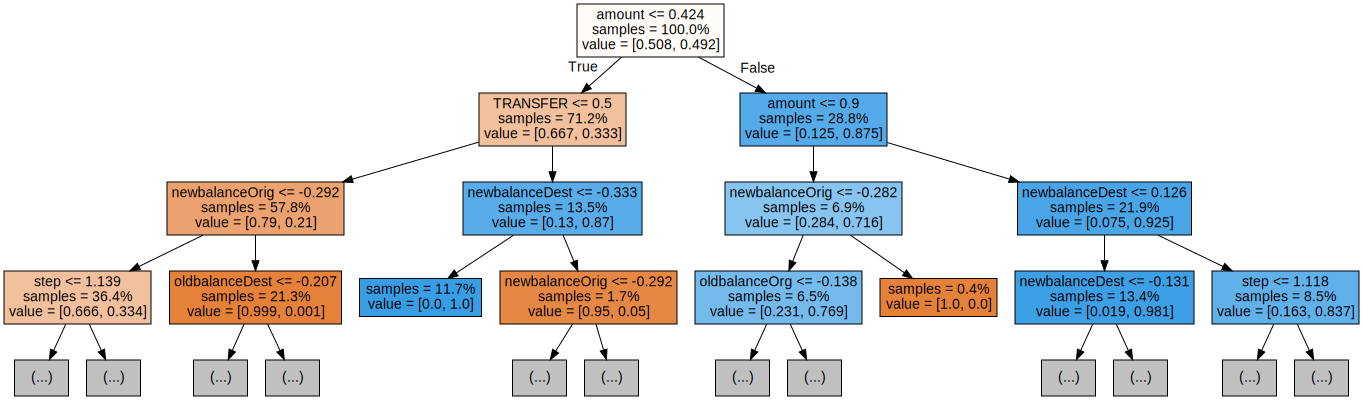

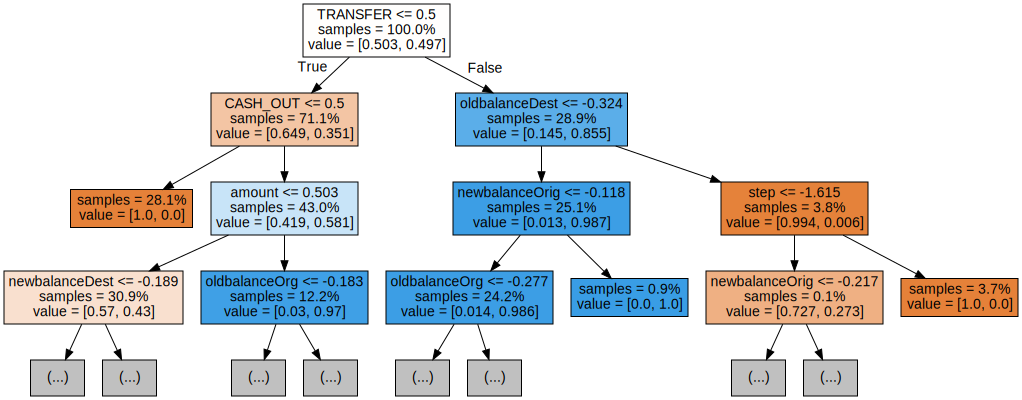

In [32]:
# Export the first three decision trees from the forest

for i in range(4):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [35]:
param_dist = {'n_estimators': randint(50,1000),
              'max_depth': randint(1,30)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=7,
                                 cv=7)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=7,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c465b2ba890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c465b607670>})

In [36]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 27, 'n_estimators': 378}


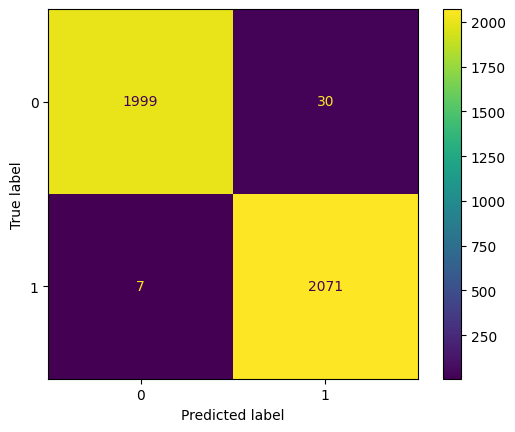

In [37]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9220842464085708
Precision: 0.9313052011776252
Recall: 0.9133782483156881
